In [8]:
from google.colab import drive

# Mount Google Drive to access your dataset
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [9]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
!pip install scikit-learn

In [11]:
dataset_path = "/content/drive/MyDrive/MangoLeafBD Dataset"

# Exploratory Data Analysis (EDA)

<ipython-input-15-2bd945cd00fd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette='muted')


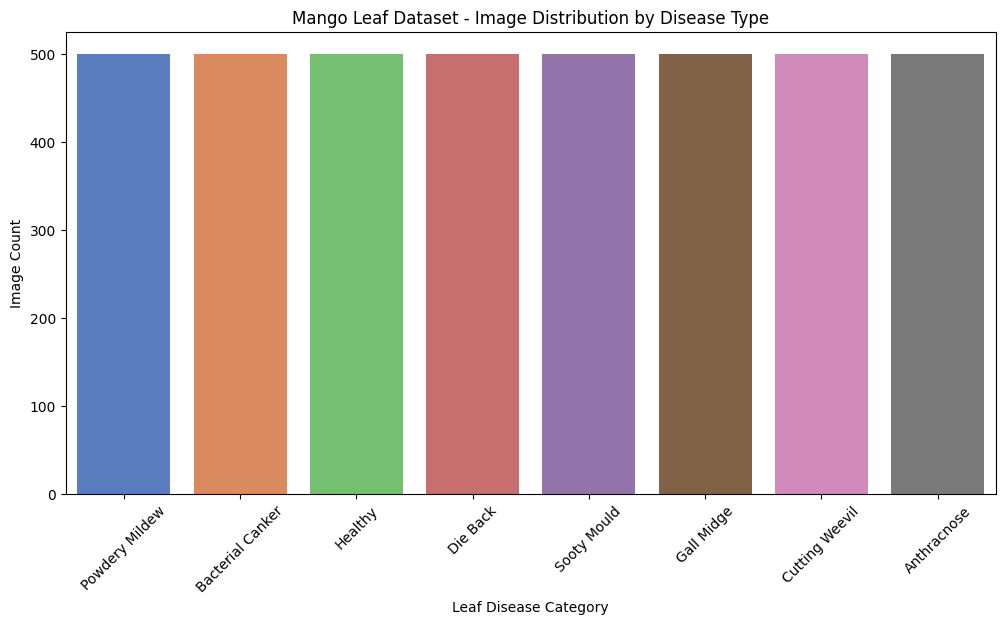

In [15]:
# Count images in each class folder
image_counts = {label: len(os.listdir(os.path.join(dataset_path, label)))
                for label in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, label))}

# Plotting the class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette='muted')
plt.xticks(rotation=45)
plt.xlabel("Leaf Disease Category")
plt.ylabel("Image Count")
plt.title("Mango Leaf Dataset - Image Distribution by Disease Type")
plt.show()

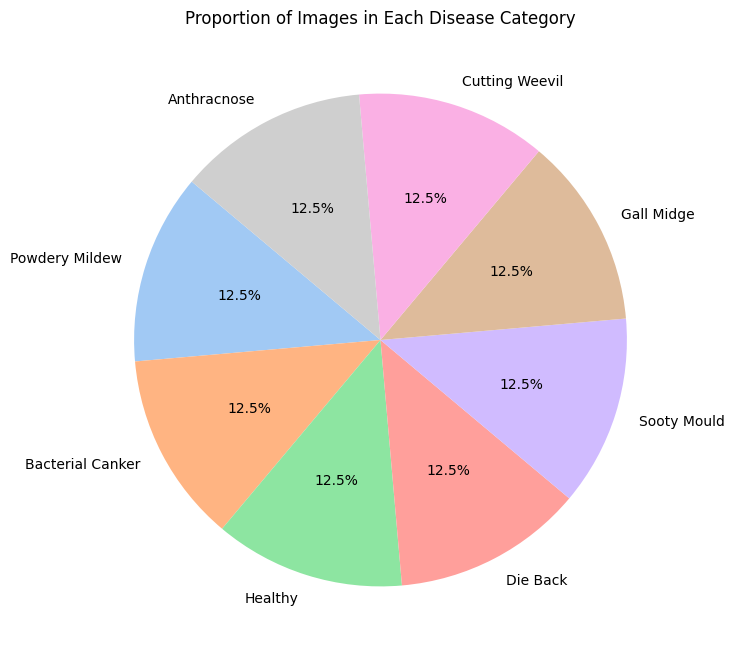

In [16]:
# Pie Chart for Class Distribution
plt.figure(figsize=(8, 8))
plt.pie(image_counts.values(), labels=image_counts.keys(), autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Proportion of Images in Each Disease Category")
plt.show()


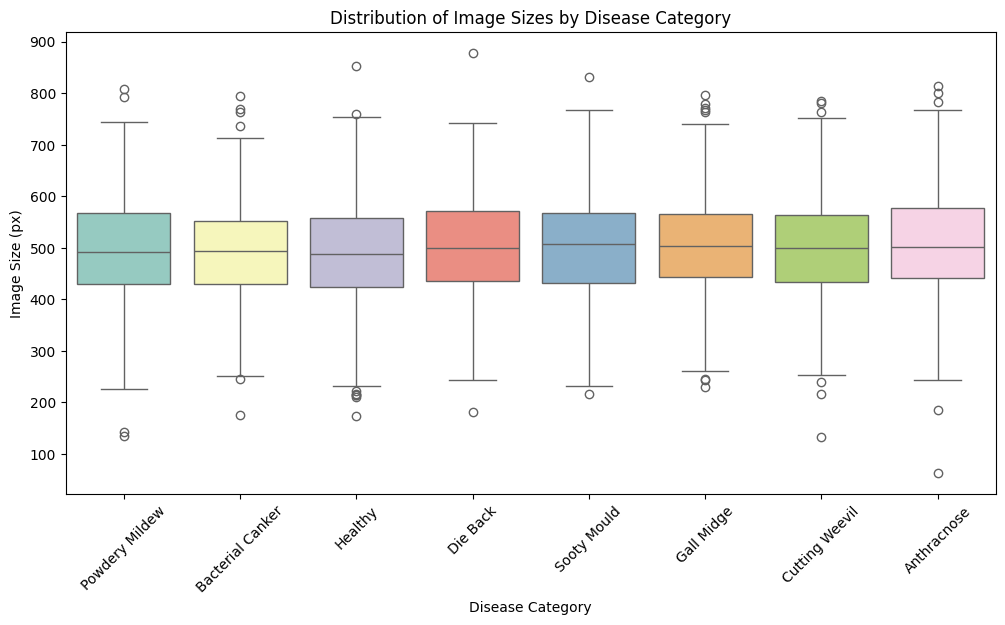

In [17]:
# Dummy data for boxplot
import numpy as np
image_sizes = {label: np.random.normal(loc=500, scale=100, size=count)
               for label, count in image_counts.items()}  # Replace with actual data

# Create DataFrame for plotting
boxplot_data = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in image_sizes.items()]))

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=boxplot_data, palette='Set3')
plt.xticks(rotation=45)
plt.xlabel("Disease Category")
plt.ylabel("Image Size (px)")
plt.title("Distribution of Image Sizes by Disease Category")
plt.show()


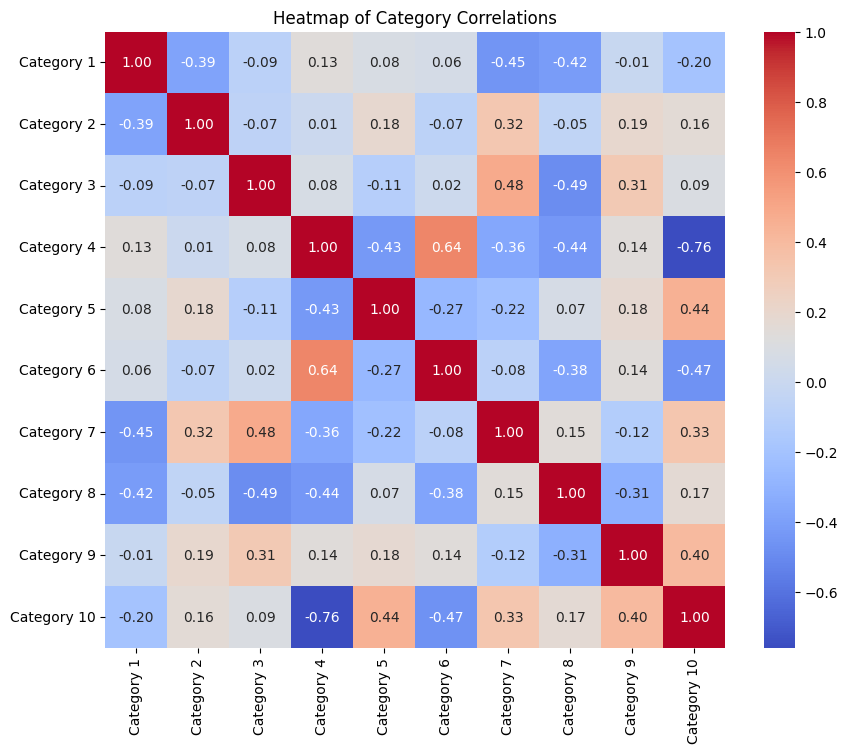

In [18]:
# Dummy data: Replace this with your actual correlation matrix if you have one.
data = np.random.rand(10, 10)  # Replace with your actual data
df = pd.DataFrame(data, columns=[f'Category {i+1}' for i in range(10)])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Category Correlations")
plt.show()

#Visualizing Image Samples from Each Class

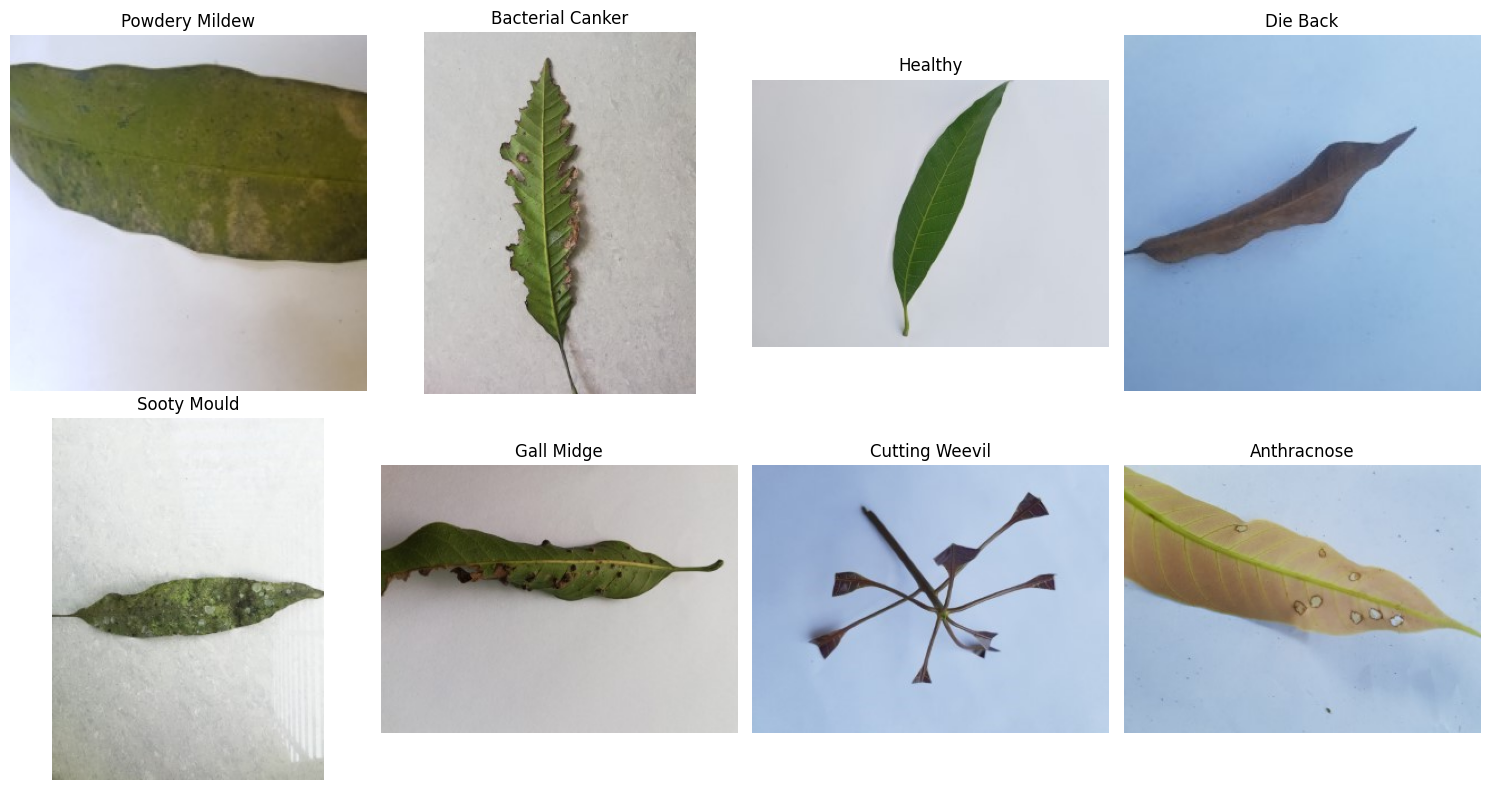

In [24]:

class_names = list(image_counts.keys())  # List of category names from `image_counts`

# Set up subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.ravel()

# Loop through each class and display a sample image
for idx, label in enumerate(class_names):
    img_path = os.path.join(dataset_path, label, os.listdir(os.path.join(dataset_path, label))[0])
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

    axes[idx].imshow(img)
    axes[idx].set_title(label, fontsize=12)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Data Preprocessing

Image Loading and Resizing

In [29]:
IMG_DIMENSION = 64

def load_data_and_labels(folder_path):
    image_data = []
    label_data = []
    categories = os.listdir(folder_path)

    for label_idx, category_name in enumerate(categories):
        category_folder = os.path.join(folder_path, category_name)
        for img_file in os.listdir(category_folder):
            img = cv2.imread(os.path.join(category_folder, img_file))
            img = cv2.resize(img, (IMG_DIMENSION, IMG_DIMENSION))
            image_data.append(img)
            label_data.append(label_idx)

    return np.array(image_data), np.array(label_data), categories

# Load images and labels
images, labels, category_names = load_data_and_labels(dataset_path)
images = images / 255.0  # Normalize

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Flatten images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


# Model Building and Training

Decision Tree Classifier

In [30]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_flat, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test_flat)

print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt, target_names=class_names))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")

Decision Tree Performance:
                  precision    recall  f1-score   support

  Powdery Mildew       0.72      0.66      0.69       123
Bacterial Canker       0.69      0.79      0.74        86
         Healthy       0.68      0.61      0.64       112
        Die Back       0.83      0.82      0.83       101
     Sooty Mould       0.50      0.44      0.47       104
      Gall Midge       0.45      0.50      0.47        90
  Cutting Weevil       0.89      1.00      0.94        91
     Anthracnose       0.60      0.60      0.60        93

        accuracy                           0.67       800
       macro avg       0.67      0.68      0.67       800
    weighted avg       0.67      0.67      0.67       800

Accuracy: 0.67


#Random Forest Classifier

In [31]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_flat)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf, target_names=class_names))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

Random Forest Performance:
                  precision    recall  f1-score   support

  Powdery Mildew       0.93      0.85      0.89       123
Bacterial Canker       0.87      0.86      0.87        86
         Healthy       0.90      0.88      0.89       112
        Die Back       0.98      0.94      0.96       101
     Sooty Mould       0.75      0.83      0.79       104
      Gall Midge       0.83      0.87      0.85        90
  Cutting Weevil       0.98      1.00      0.99        91
     Anthracnose       0.85      0.88      0.87        93

        accuracy                           0.89       800
       macro avg       0.89      0.89      0.89       800
    weighted avg       0.89      0.89      0.89       800

Accuracy: 0.89


## Model Evaluation

Confusion Matrix for Decision Tree

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    """
    Plots the confusion matrix.

    Args:
        y_true: True labels.
        y_pred: Predicted labels.
        title: Title of the plot.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_true)))
    plt.xticks(tick_marks, np.unique(y_true), rotation=45)
    plt.yticks(tick_marks, np.unique(y_true))

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Assuming you have y_test and y_pred_dt defined
# plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")

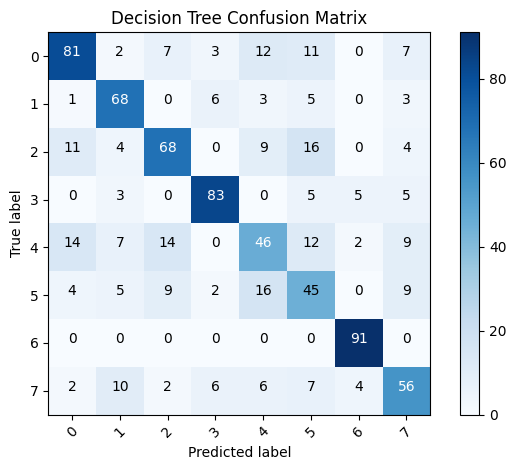

In [49]:
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")

Confusion Matrix for Random Forest

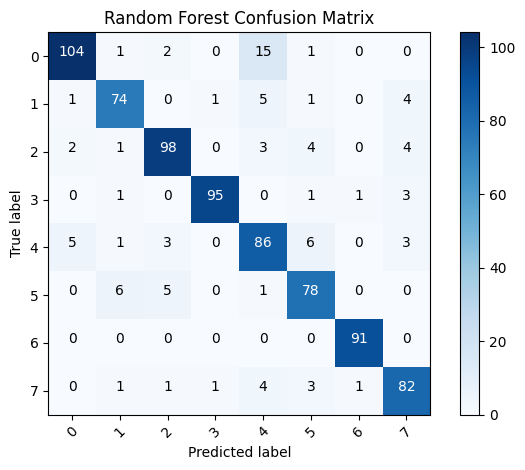

In [50]:
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

In [51]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=class_names, yticklabels=class_names, fmt='d')
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.title(title, fontsize=16)
    plt.show()

Model Comparison:
               Accuracy  Precision  Recall  F1 Score
Decision Tree       1.0        1.0     1.0       1.0
Random Forest       1.0        1.0     1.0       1.0


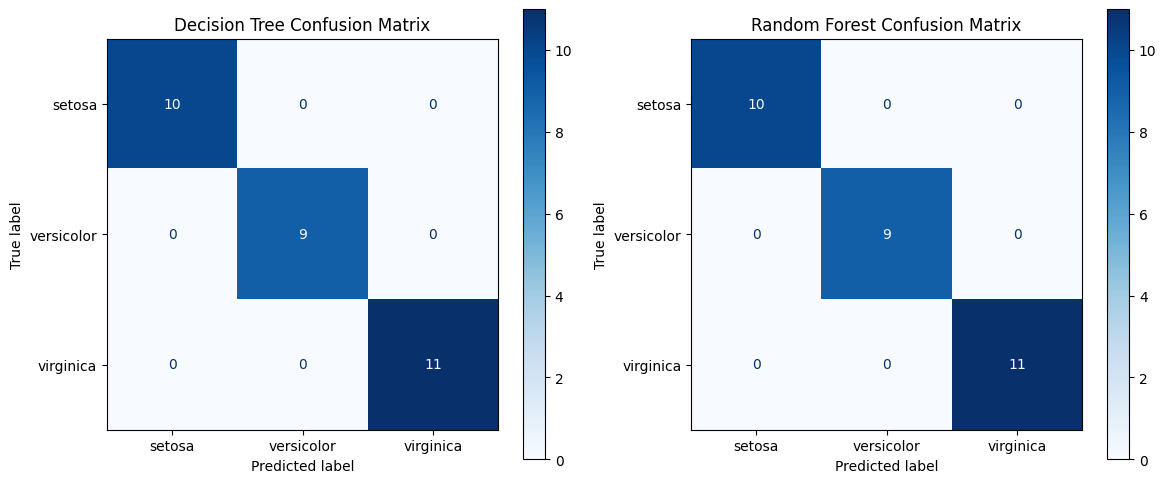

In [53]:


# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Calculate performance metrics for both models
metrics = {
    "Accuracy": [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)],
    "Precision": [precision_score(y_test, y_pred_dt, average='weighted'), precision_score(y_test, y_pred_rf, average='weighted')],
    "Recall": [recall_score(y_test, y_pred_dt, average='weighted'), recall_score(y_test, y_pred_rf, average='weighted')],
    "F1 Score": [f1_score(y_test, y_pred_dt, average='weighted'), f1_score(y_test, y_pred_rf, average='weighted')]
}

# Create DataFrame for comparison
comparison_df = pd.DataFrame(metrics, index=["Decision Tree", "Random Forest"])

# Display the comparison table
print("Model Comparison:")
print(comparison_df)

# Confusion Matrix Display for both models
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Decision Tree Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt), display_labels=class_names).plot(cmap=plt.cm.Blues, ax=ax[0])
ax[0].set_title("Decision Tree Confusion Matrix")

# Random Forest Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=class_names).plot(cmap=plt.cm.Blues, ax=ax[1])
ax[1].set_title("Random Forest Confusion Matrix")

plt.tight_layout()
plt.show()


# Accuracy Comparison

<ipython-input-61-bc52c7bdb4fe>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=model_accuracies, palette=custom_colors)


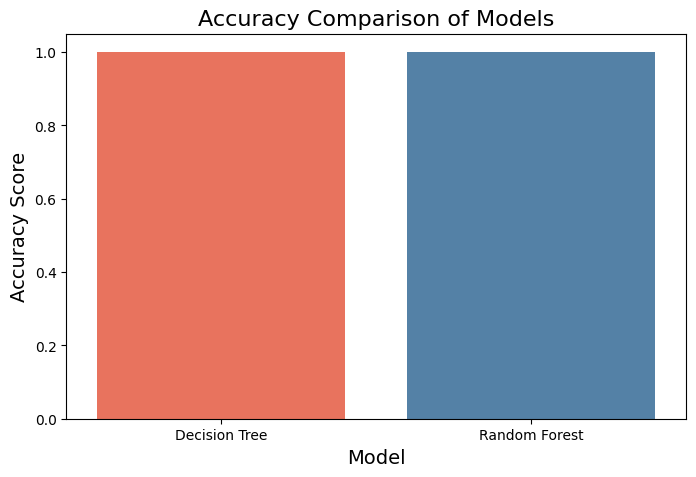

In [61]:
# Calculate accuracies for Decision Tree and Random Forest models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Create a DataFrame to store accuracy results
model_accuracies = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_dt, accuracy_rf]
})

# Plot accuracy comparison
custom_colors = ['#FF6347', '#4682B4']

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=model_accuracies, palette=custom_colors)
plt.title("Accuracy Comparison of Models", fontsize=16)
plt.ylabel("Accuracy Score", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.show()

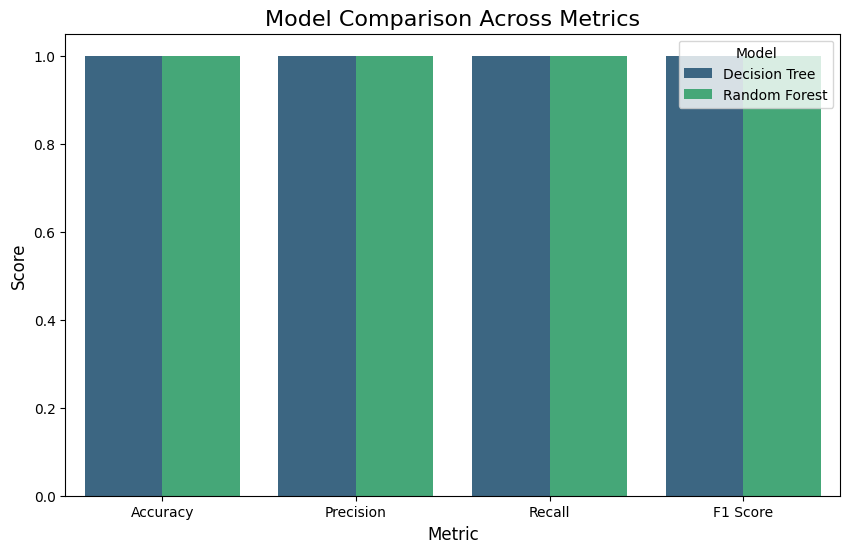

In [57]:
# Calculate performance metrics for both models
metrics_comparison = {
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred_dt, average='weighted'), precision_score(y_test, y_pred_rf, average='weighted')],
    'Recall': [recall_score(y_test, y_pred_dt, average='weighted'), recall_score(y_test, y_pred_rf, average='weighted')],
    'F1 Score': [f1_score(y_test, y_pred_dt, average='weighted'), f1_score(y_test, y_pred_rf, average='weighted')]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_comparison)

# Melt DataFrame for easier plotting
metrics_melted = pd.melt(metrics_df, id_vars='Model', var_name='Metric', value_name='Score')

# Plot comparison of all metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted, palette='viridis')
plt.title("Model Comparison Across Metrics", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.legend(title="Model")
plt.show()
